In [ ]:
!pip3 uninstall opencv-python -y

In [ ]:
!pip3 list | grep opencv

In [ ]:
import cv2
print(cv2.__version__)

In [1]:
import numpy as np
from jetbot import Robot
from jetbot import Camera
import cv2
print(cv2.__version__)
import asyncio
from PIL import Image
from IPython.display import clear_output
import matplotlib.pyplot as plt
import ipywidgets.widgets as widgets
import traitlets
from jetbot import bgr8_to_jpeg

4.1.1


In [2]:
robot = Robot()
camera = Camera.instance(width=1280, height=720)
image = widgets.Image(format='jpeg', width=1280, height=720)
CLASSES = ["cone",
"cylinder",
"cuboid",
"sphere1"]

COLORS = np.random.uniform(0,255,size=(len(CLASSES),3))

net = cv2.dnn.readNetFromTensorflow('data/graphs/frozen_inference_graph.pb', 'data/graphs/graph.pbtxt')
camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)

Image input size: 720, 1280
Id: 2
cylinder: 76.66%


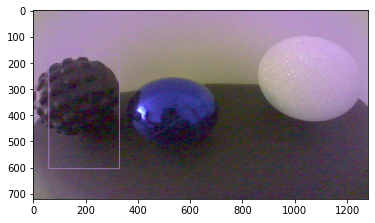

Id: 3
cuboid: 96.48%


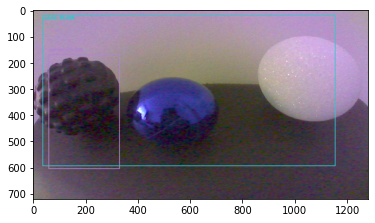

Id: 4
sphere1: 80.57%


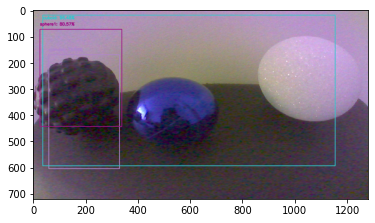

Image input size: 720, 1280
Id: 3
cuboid: 96.54%


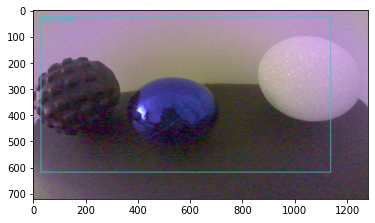

Id: 4
sphere1: 83.24%


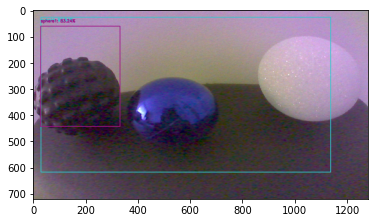

Image input size: 720, 1280
Id: 3
cuboid: 96.61%


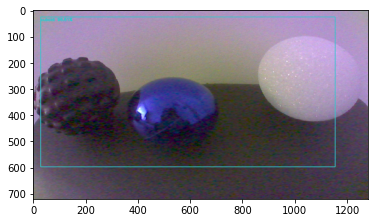

Id: 4
sphere1: 73.94%


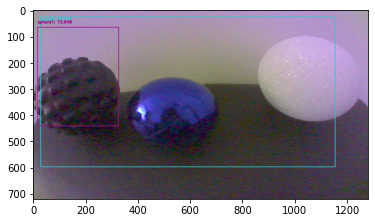

Image input size: 720, 1280
Id: 3
cuboid: 96.13%


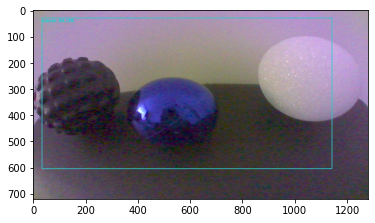

Image input size: 720, 1280
Id: 3
cuboid: 96.60%


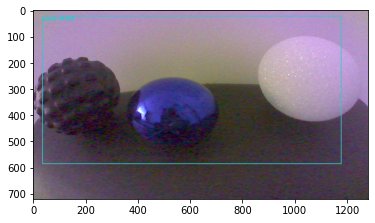

Image input size: 720, 1280
Id: 2
cylinder: 83.95%


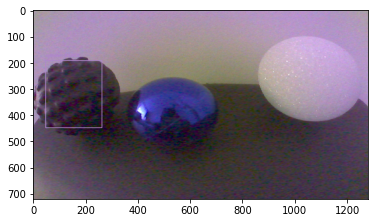

Id: 3
cuboid: 96.98%


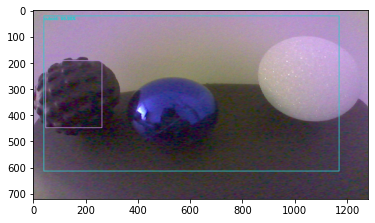

Id: 4
sphere1: 86.97%


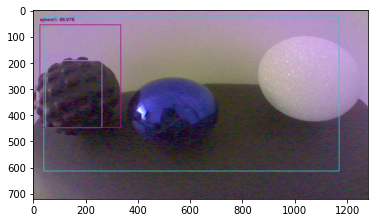

Id: 4
sphere1: 70.58%


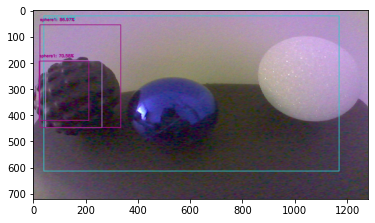

Image input size: 720, 1280
Id: 3
cuboid: 96.76%


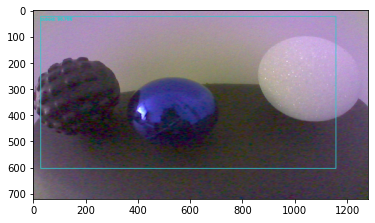

Id: 4
sphere1: 71.66%


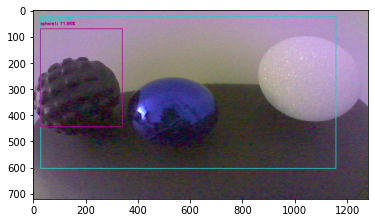

Image input size: 720, 1280
Id: 2
cylinder: 79.95%


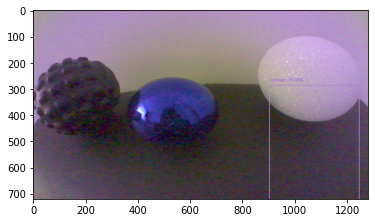

Id: 3
cuboid: 96.79%


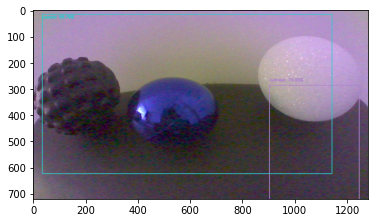

Image input size: 720, 1280
Id: 2
cylinder: 79.76%


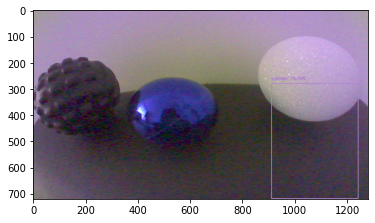

Id: 2
cylinder: 72.90%


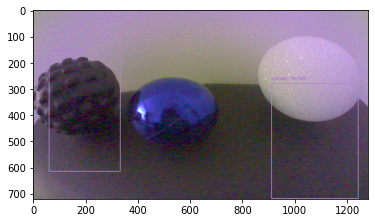

Id: 3
cuboid: 96.69%


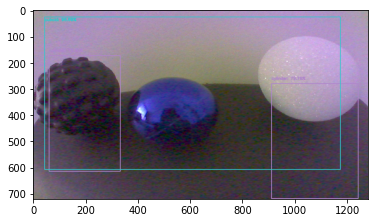

In [5]:
i=0
while i < 20:
#     clear_output(wait=True)
    input_image = cv2.cvtColor(camera.value, cv2.COLOR_RGBA2RGB)
    (h,w) = input_image.shape[:2]
    print("Image input size: " + str(h) + ", " + str(w))
    blob = cv2.dnn.blobFromImage(image=cv2.resize(input_image,(h,w)), scalefactor=1.0, size=(300,300), swapRB=True)
    net.setInput(blob)
    detections = net.forward()
    for j in np.arange(0, detections.shape[2]):
        confidence = detections[0,0,j,2]
        if confidence > 0.70:
            idx = int(detections[0,0,j,1])
            box = detections[0,0,j,3:7] * np.array([w,h,w,h])
            (startX, startY, endX, endY) = box.astype("int")
            print("Id: " + str(idx))
            label = "{}: {:.2f}%".format(CLASSES[idx-1], confidence*100)
            print(label)
            cv2.rectangle(input_image, (startX,startY), (endX,endY), COLORS[idx-1],2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(input_image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx-1],2)
            plt.imshow(input_image)
            plt.show()
            i+= 1

In [ ]:
Main changes applied so far: changing the layer batch optimazation FusedBatchNormV3 to FusedBatchNorm because of incongruences in tensorflow module version